In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hist.png" style="zoom:100%;" />

## 讀取資料

In [2]:
""" Your code here: 讀取 titanic.csv """
file = pd.read_csv('titanic.csv')

## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [3]:
""" Your code here: """
file.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

In [6]:
""" Your code here: """
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


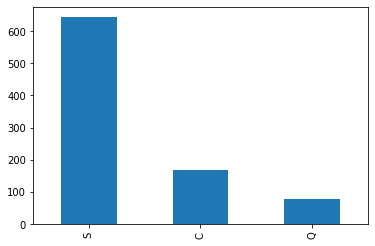

In [19]:
file['Embarked'][file['Embarked'].notnull()].value_counts().plot(kind='bar')

In [20]:
file['Embarked'].fillna('S', inplace=True)
file['Age'].fillna(file['Age'].mean(), inplace=True)

In [21]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [22]:
""" Your code here: """
trans_ta = ['Sex', 'Embarked']
for ta in trans_ta:
    file[ta] = LabelEncoder().fit_transform(file[ta])

## 切分訓練集及測試集

In [23]:
""" Your code here: """
y = file['Survived']
file.drop(['Survived'], axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(file, y, test_size=0.2)

## Training

In [24]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [25]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       427
           1       0.99      0.98      0.98       285

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712


Testing report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       122
           1       0.64      0.65      0.64        57

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179

